In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import norse
from norse.torch import li_step, LICell, LIState, LIParameters
from norse.torch import lif_step, LIFCell, LIFState, LIFParameters
from norse.torch.module import leaky_integrator as li
from norse.torch.functional import lif as lif
import ProjectMethods as pm
from scipy.signal import convolve2d


N=100
U = 2
T=200


#Creating a cell with a leak of 1 and a current time ( synaptic) time constant
p = li.LIParameters(v_leak = torch.tensor(0), tau_syn_inv=torch.as_tensor(1/5e-3), tau_mem_inv= torch.as_tensor(0.7 / 1e-2))

#Creating LIF parameters, TBDefined
p2 = LIFParameters(tau_syn_inv = torch.as_tensor(1.0 / 5e-3), tau_mem_inv = torch.as_tensor(0.7 / 1e-2), v_leak = torch.as_tensor(0), v_th = torch.as_tensor(0.5))


#Initial state of cell LI cells
stateCell = li.LIState(v = torch.zeros(N),
                i = torch.zeros(N))

#Initial state of cell LIF cells
#stateCell2= LIFState(z = torch.zeros(N), v = torch.zeros(N), i = torch.zeros(N))
stateCell2= lif.LIFFeedForwardState(v = torch.zeros(N), i = torch.zeros(N))


weights = torch.ones(N)
voltages = torch.zeros(N,U,T)
trueVals = torch.zeros(N,U)

voltages2 = torch.zeros(N,U,T)
trueVals2 = torch.zeros(N,U)


decode = pm.decode(p)
decode.print_max_min()


Max: tensor([5.0000])
Min: tensor([0.])


In [2]:
data = pm.create_sparse_data(100, 100, 100)
matrix = pm.sparse_data_to_sparse_matrix(data, [100, 100, 100])

Activity in position  [19 , 0] 


In [3]:
matrix2 = torch.zeros(100,100)
kernel = torch.ones([10,10])
for nr, array in enumerate(matrix, start=0):
    convolved = convolve2d(array, kernel, mode="valid")
    matrix2[nr] = torch.from_numpy(convolved[::10, ::10] /10).flatten()


tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000])
tensor([0., 1.])


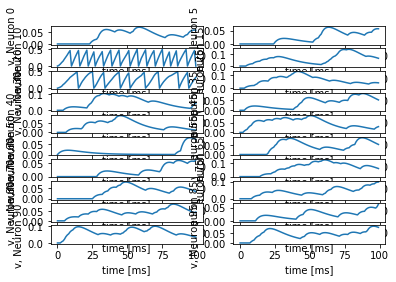

In [4]:
volt3 = torch.zeros(N,100)
for t, array in enumerate(matrix2,start=0):
    #print(array.type())
    #print(array.size())
    #print(array.size())
    v, stateCell2 = lif.lif_feed_forward_step(input_tensor=array, state=stateCell2, p=p2, dt=0.001)
    #v, stateCell2 = lif_step(input_tensor=array, state=stateCell2,input_weights=weights, recurrent_weights=weights , p=p2, dt=0.001)
    #print(v.size())
    #print(stateCell2)
    #print(stateCell2.v)
    for i in range(100):
        volt3[i][t] = stateCell2.v[i]
        #if stateCell2.v[i] > 0:
         #   print("{}".format(i))
    #print(len(stateCell2[0][0]))
    #volt3
    #voltages[n][y][x] = v[n]
 
pm.plotNeurons(volt3,N)

In [23]:
for x in range(len(data)):
    


15
15
15
15
15
15
15
15
13
15
15
15
15
15
15
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
15
15
15
15
15
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
15
15
15
15
15
15
15
14
15
15
15
14
15
15
15
15
15
15
15
14
15
15
15
15
15
15
13
15
15
15
15
15
15
14
15
15
15
15
15
15
15
15
15
14
15
14
15


In [6]:


#while True:
for y in range(U): 
    trueAngle = torch.randint(1800,2500,(2,))
    angleval = torch.ones(2)-((trueAngle-1800)/700)

    for x in range(T):
        input = torch.zeros(N)
        for n in range(N):
            input[n] = to_input(torch.rand(1)-angleval[n])
            #input = torch.tensor([to_input(torch.rand(1)-angleval[0]),to_input(torch.rand(1)-angleval[1])])
        v, stateCell = li.li_feed_forward_step(input, state=stateCell, p=p, dt = 0.001)


        for n in range(N):
            voltages[n][y][x] = v[n]

        if x % 50 == 0:
            print("True angle: {}".format(trueAngle))
            print("Approximated angle: {}".format(decode.decode_to_angle(v,adValue)))
       # if x == 198:
        #    adValue = pm.train_val_to_angle_adjust(v, trueAngle, adValue)
         #   print(adValue)



#pm.plotNeurons(voltages, N,  U)

True angle: tensor([1812, 2132, 2118,  ..., 1923, 1893, 2265])
Approximated angle: tensor([1800, 1800, 1800,  ..., 1800, 1800, 1800], dtype=torch.int32)
True angle: tensor([1812, 2132, 2118,  ..., 1923, 1893, 2265])
Approximated angle: tensor([1805, 2127, 2128,  ..., 1895, 1889, 2255], dtype=torch.int32)
True angle: tensor([1812, 2132, 2118,  ..., 1923, 1893, 2265])
Approximated angle: tensor([1814, 2081, 2155,  ..., 1983, 1917, 2234], dtype=torch.int32)
True angle: tensor([1812, 2132, 2118,  ..., 1923, 1893, 2265])
Approximated angle: tensor([1800, 2129, 2077,  ..., 2036, 1938, 2283], dtype=torch.int32)


ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>